In [18]:
from cvm.utils import UnitConvert as uc
from matplotlib import pyplot as plt

from pprint import pprint

from cvm.A1 import Tetrahedron, TetraOctahedron
from cvm.sample import Sample
from cvm.vibration import ClusterVibration

from cvm.utils import parse_formula, mixed_atomic_weight, parse_input_set, UnitConvert, cvm_context
import numpy as np
import pandas as pd

In [19]:
inp = parse_input_set('AlMg')

In [20]:
tetra = Tetrahedron(**inp)

with cvm_context(simple_print='True'):
    print(tetra)

Tetrahedron:
  | 
  |-meta:
  |   |-host: al
  |   |-impurity: mg
  |   |-prefix: 
  |   |-suffix: vib_to
  |   |-description: almg solubility limit calculation with tetrahedron approximation
  |   |-structure: a1
  |   |-timestamp: 2019-06-22 21:11:47
  | 
  |-tag_800k-<$T_\mathrm{FD}=800$K>-<skip: False>


In [21]:
inp['series'][0]['energies']

,Al,Al4Mg2,Al5Mg1,Al6,Mg4,Al1Mg3,Al2Mg2,Al3Mg1,Al4,Mg
lattice,,,,,,,,,,
7.0,-6610.159790,39665.101327,39664.137055,39663.165486,26446.244616,26445.137402,26444.101790,26443.080585,26442.110188,-5452.902109
7.1,-6610.273085,39664.846348,39664.008707,39663.165516,26445.741918,26444.757314,26443.846845,26442.952347,26442.110223,-5453.141078
7.2,-6610.361850,39664.605072,39663.887349,39663.165540,26445.264008,26444.396755,26443.603729,26442.831068,26442.110252,-5453.349320
7.3,-6610.428909,39664.376710,39663.772552,39663.165560,26444.809810,26444.054776,26443.373293,26442.716325,26442.110276,-5453.529929
7.4,-6610.476771,39664.158459,39663.662925,39663.165577,26444.374122,26443.727323,26443.153148,26442.606681,26442.110296,-5453.686714
7.5,-6610.507655,39663.950111,39663.558204,39663.165590,26443.956528,26443.414100,26442.943188,26442.502039,26442.110311,-5453.821996
7.6,-6610.523684,39663.754684,39663.460089,39663.165600,26443.563128,26443.119708,26442.746472,26442.403936,26442.110323,-5453.936375
7.7,-6610.526815,39663.573471,39663.369171,39663.165608,26443.196765,26442.846208,26442.563278,26442.313020,26442.110333,-5454.031096
7.8,-6610.518761,39663.405072,39663.284722,39663.165614,26442.854858,26442.591554,26442.393069,26442.228570,26442.110341,-5454.108520


In [22]:
sample = tetra.tag_800k
sample

tag_800k-<$T_\mathrm{FD}=800$K>-<skip: False>:
  | 
  |-Normalizer:
  |   |-Al2Mg2: [[1, 11, 2]]
  | 
  |-Al4Mg2:
  |   |-c1: 2.487379,  c2: 2.447459,  lambda: 1.141575
  |   |-r0: 3.099911,  x0: 0.029049
  |   |-Gruneisen constant: 1.769390
  |   |-Equilibrium lattice constant: 7.932290 a.u.
  |   |-Bulk Modulus: 590.193241 Kbar
  |   |-Debye temperature: 348.658499 K
  | 
  |-Al5Mg1:
  |   |-c1: 2.480794,  c2: 2.451838,  lambda: 1.186364
  |   |-r0: 3.050024,  x0: 0.026825
  |   |-Gruneisen constant: 1.809219
  |   |-Equilibrium lattice constant: 7.804638 a.u.
  |   |-Bulk Modulus: 648.997914 Kbar
  |   |-Debye temperature: 359.600526 K
  | 
  |-Al6:
  |   |-c1: 2.489328,  c2: 2.488623,  lambda: 1.232519
  |   |-r0: 2.999432,  x0: 0.024801
  |   |-Gruneisen constant: 1.848428
  |   |-Equilibrium lattice constant: 7.675180 a.u.
  |   |-Bulk Modulus: 722.980157 Kbar
  |   |-Debye temperature: 373.258372 K
  | 
  |-Mg4:
  |   |-c1: 2.699315,  c2: 2.700068,  lambda: 0.973858
  |   |-r0: 

In [23]:
vib = sample.Al4
vib

Al4:
  |-c1: 2.489332,  c2: 2.488646,  lambda: 1.232508
  |-r0: 2.999428,  x0: 0.024802
  |-Gruneisen constant: 1.848409
  |-Equilibrium lattice constant: 7.675171 a.u.
  |-Bulk Modulus: 722.974678 Kbar
  |-Debye temperature: 373.256741 K

In [24]:
vib(800, min_x='lattice')

(-3.7689058833712434, 7.823180326897214)

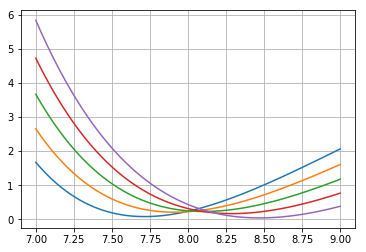

In [25]:
x = np.linspace(vib._xs[0], vib._xs[-1], 100)

y = [sample.Al4(200, r=x_) for x_ in x]
plt.plot(uc.ad2lc(x), y)

y = [sample.Al3Mg1(200, r=x_) for x_ in x]
plt.plot(uc.ad2lc(x), y)

y = [sample.Al2Mg2(200, r=x_) for x_ in x]
plt.plot(uc.ad2lc(x), y)

y = [sample.Al1Mg3(200, r=x_) for x_ in x]
plt.plot(uc.ad2lc(x), y)

y = [sample.Mg4(200, r=x_) for x_ in x]
plt.plot(uc.ad2lc(x), y)

plt.grid()

In [38]:
def patch(_, r0):

    _1st = -0.081 + (-0.00365 * (r0 - 7.85) / 0.1)
    
    return {'pair1': -_1st}

In [39]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


def percent(x, pos=0):
    return u'{:3.1f}'.format(100 * x)


def process(meta, *results, experiment=None):    

    def percent(x, pos=0):
        return u'{:3.1f}'.format(100 * x)
    
    fig, ax = plt.subplots(figsize=(8, 4.5), dpi=150)  # 800 * 500
    plt.subplots_adjust(top=0.97, bottom=0.14, left=0.12, right=0.97)

    # draw experiment
    if experiment is not None:
        y_exp = experiment['temperature']
        x_exp = experiment['concentration']
        # ax.annotate('1200$K$', (0.005, 410), fontsize=13)
        ax.plot(
            x_exp, y_exp, 'x--', mew=3, mfc='w', ms=6, lw=1.5, label='Experiment')

    # draw results
    line_type = ['o-', 'o--', 'o:']
    for i, res in enumerate(results):
        # plt.xlim(xmin=0.5, xmax=12.5)
        # plt.axhline(y=0, color='k', ls='-', lw=1.0)
        # label[i] = 'int= ' + '{:07.4}'.format(Results[i]['1st_int'])
        ax.plot(
            res['c'],
            res['temp'],
            # 'o-',
            line_type[i],
            color='darkorange',
            ms=4,
            lw=1.5,
            label=res['label'])

    # set formater
    ax.xaxis.set_major_formatter(FuncFormatter(percent))
    ax.set_xlim(0, 0.122)

    # for preview
    ax.grid(axis='y')
    ax.tick_params(labelsize=14.5)
    ax.set_ylabel(r'Temperature, $T$/K', size=16)
    ax.set_xlabel(
        r'Concentration of ' + meta['impurity'].capitalize() +
        r', $c$/at$\%$',
        size=16)
#     ax.annotate(
#         r'(b)CVMTO10, with thermal vibration effect', (0.003, 1830), size=15)
#     ax.annotate(r'$T_\mathrm{FD}=1600$K', (0.004, 1630), size=17)
    ax.legend(loc='lower right', markerscale=1.2, fontsize=15)
    fig_name = "_".join(
        (meta['prefix'], meta['host'], meta['impurity'],
         meta['suffix'])).lstrip('_')
#     plt.savefig(fig_name, dpi=600)  # 300 dpi
    plt.show()



In [40]:
for status in tetra(sample_paras=dict(energy_patch=patch, vibration=False), verbose=False):
    print('1st: %.5f eV' % (status.int_energy.pair1))
    print('2nd: %.5f eV' % (status.int_energy.pair2))
    print('triple: %.5f eV' % (status.int_energy.triple))
    print('tetra: %.5f eV' % (status.int_energy.tetra))
    print('T=%6.3f' % status.temperature, 'Concentration=%6.4f%%' % (status.concentration * 100), 'Counts=%s' % status.num_of_ite, '\n')

1st: -0.04752 eV
2nd: 0.00065 eV
triple: 0.00859 eV
tetra: 0.00271 eV
T=500.000 Concentration=0.9269% Counts=78 

1st: -0.04750 eV
2nd: 0.00067 eV
triple: 0.00857 eV
tetra: 0.00270 eV
T=532.759 Concentration=1.3263% Counts=103 

1st: -0.04748 eV
2nd: 0.00070 eV
triple: 0.00854 eV
tetra: 0.00269 eV
T=565.517 Concentration=1.8496% Counts=113 

1st: -0.04746 eV
2nd: 0.00073 eV
triple: 0.00851 eV
tetra: 0.00267 eV
T=598.276 Concentration=2.5312% Counts=125 

1st: -0.04742 eV
2nd: 0.00077 eV
triple: 0.00847 eV
tetra: 0.00265 eV
T=631.034 Concentration=3.4226% Counts=142 

1st: -0.04738 eV
2nd: 0.00082 eV
triple: 0.00841 eV
tetra: 0.00261 eV
T=663.793 Concentration=4.6067% Counts=168 

1st: -0.04733 eV
2nd: 0.00089 eV
triple: 0.00832 eV
tetra: 0.00257 eV
T=696.552 Concentration=6.2361% Counts=210 

1st: -0.04726 eV
2nd: 0.00098 eV
triple: 0.00820 eV
tetra: 0.00250 eV
T=729.310 Concentration=8.6635% Counts=298 

1st: -0.04712 eV
2nd: 0.00117 eV
triple: 0.00793 eV
tetra: 0.00235 eV
T=762.069 C

In [42]:
tetra.results.tag_800k

,temperature,concentration,num_of_ite,pair1,pair2,triple,tetra
0,500.0,0.009839,1,-0.047513,0.000658,0.008584,0.002712
1,500.0,0.009747,2,-0.047513,0.000658,0.008585,0.002712
2,500.0,0.009685,3,-0.047513,0.000657,0.008585,0.002712
3,500.0,0.009636,4,-0.047514,0.000657,0.008586,0.002713
4,500.0,0.009595,5,-0.047514,0.000657,0.008586,0.002713
5,500.0,0.009560,6,-0.047514,0.000656,0.008586,0.002713
6,500.0,0.009529,7,-0.047514,0.000656,0.008586,0.002713
7,500.0,0.009501,8,-0.047514,0.000656,0.008586,0.002713
8,500.0,0.009477,9,-0.047514,0.000656,0.008586,0.002713
9,500.0,0.009455,10,-0.047514,0.000656,0.008587,0.002713


In [15]:
tmp.results

Results:
  |-<$T_\mathrm{FD}=800$K>

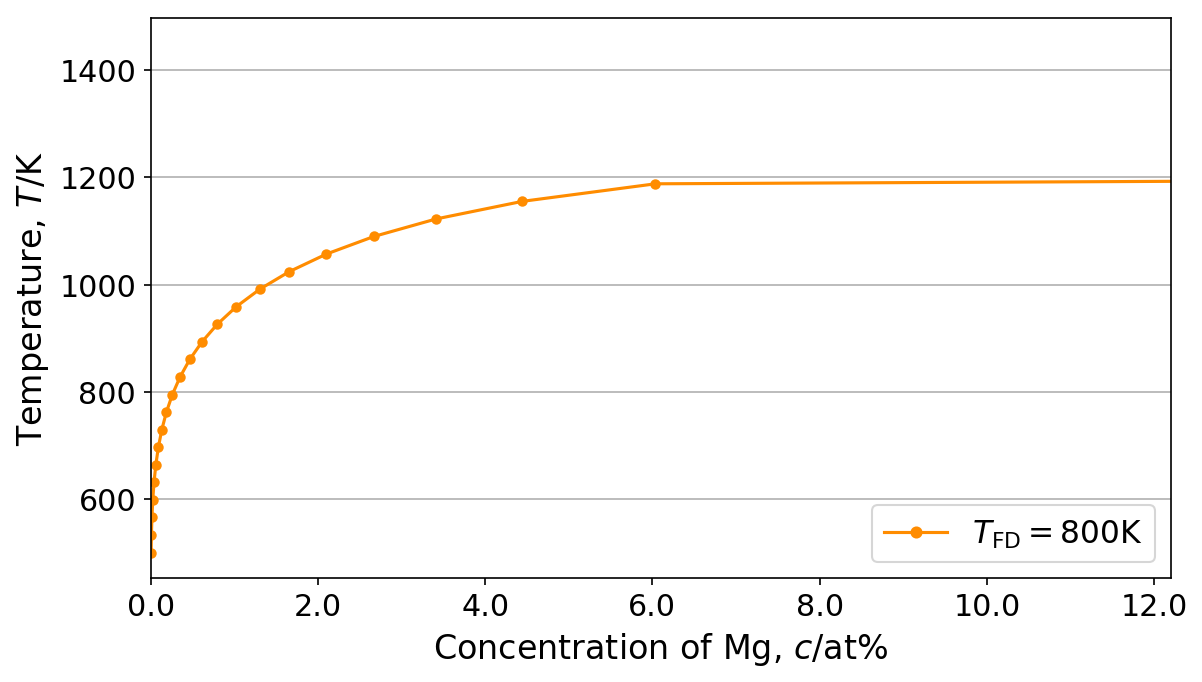

In [39]:
process(tmp.meta, dict(temp=temp, c=con, label='$T_\\mathrm{FD}=800$K'))

* T=900.0 Concentration=0.1322374574878373 Counts=214